In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load the data
train = pd.read_csv('train.csv')

In [3]:
# Simplified feature engineering
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

# Use assignment instead of inplace=True to avoid FutureWarnings
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna('S')

# Using .fillna() with assignment for 'Fare'
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())

# Map categorical variables to integers
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0}).astype(int)
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
train['Embarked'] = train['Embarked'].map(embarked_mapping).astype(int)

In [4]:
# Prepare the data for modeling
X = train.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
y = train['Survived']

In [5]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Define and fit the decision tree model
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

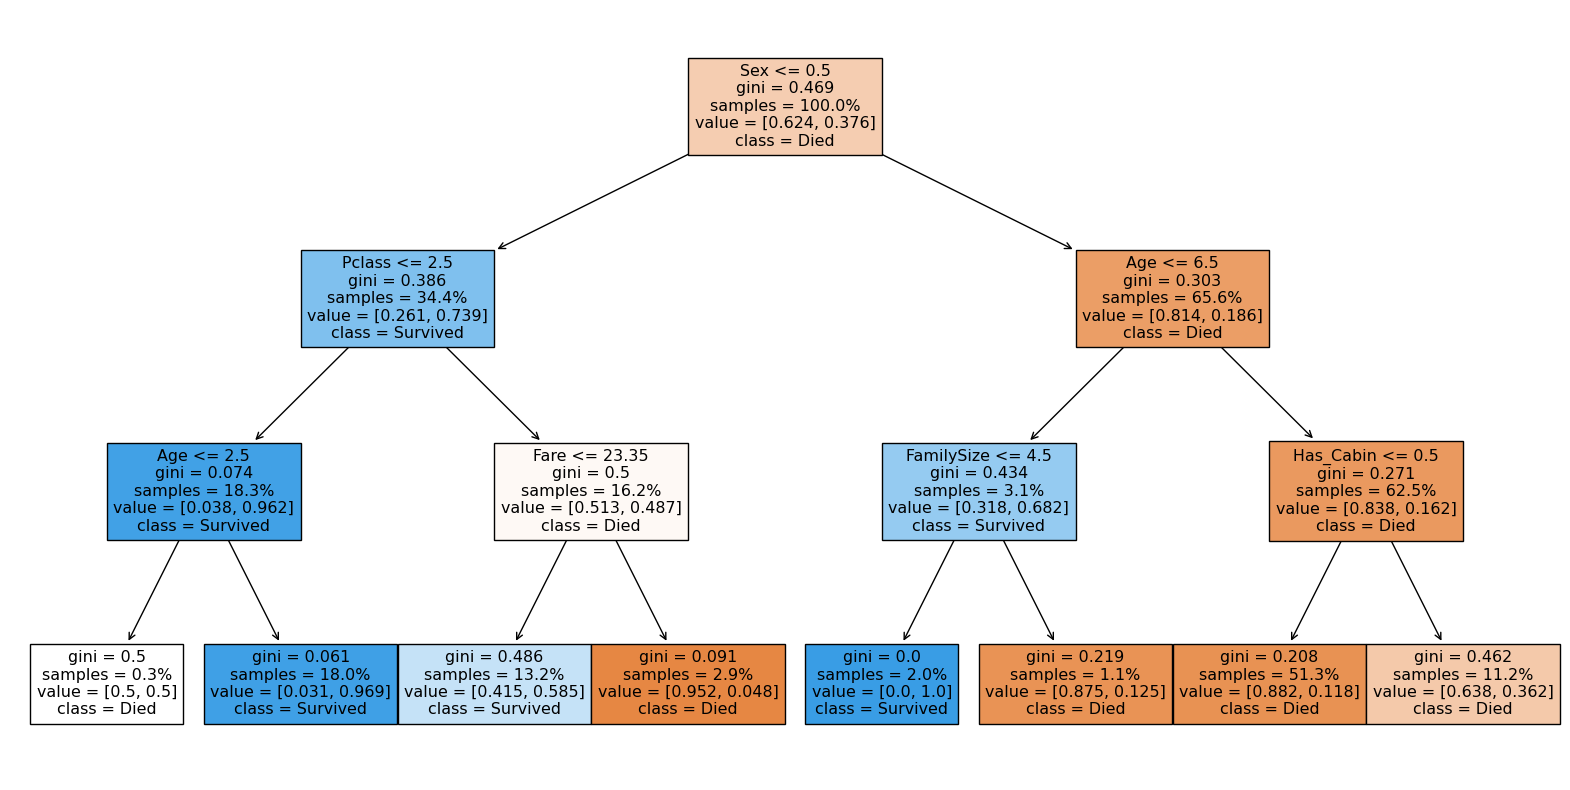

In [7]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=list(X_train.columns), class_names=['Died', 'Survived'], proportion=True)
plt.show()

In [8]:
# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 0.80
